# 졸업 프로젝트
### 건양대학교 융합IT 학과 18681032 한규리
* 주제 : 공공 데이터를 이용한 데이터 분석 및 시각화
      * 서울 내의 이디야 카페 분포
      * 서울 내의 공영주차장 분포
      * 서울 지하철 2호선의 평균 승하차 인원 수
  - 프로젝트 기간 : 2023.7.8 ~ 2023.12.12
  - 자료 출처 : <br>
    1. [한국 문화 정부원 - 전국 공영주차장 표준데이터](https://www.bigdata-culture.kr/bigdata/user/data_market/detail.do?id=6365bfc0-2531-41b6-bd6e-2e42de49dd6b)<br>
    2. [공공데이터 포털 - 소상공인시장진흥공단_상가(상권)정보](https://www.data.go.kr/tcs/dss/selectFileDataDetailView.do?publicDataPk=15083033)
    3. [서울 열린데이터 광장 - 서울시 공영주차장 안내 정보](https://data.seoul.go.kr/dataList/OA-13122/A/1/datasetView.do;jsessionid=B0A8199C5DD581C8D8731861E69A9CC8.new_portal-svr-21)
  - 사용 파일 :
    1. 소상공인시장진흥공단_상가(상권)정보_서울_202309.csv
    2. 전국주차장정보표준데이터.csv
    3. skorea_municipalities_geo_simple.json
    

### 1. 필요한 라이브러리 설치 및 데이터 로드

* matplotlib 한글 폰트 깨짐 현상 해결

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [2]:
# 이디야
import folium
import json
import glob
import os
import pandas as pd
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
filename = '/content/drive/MyDrive/Colab Notebooks/project/소상공인시장진흥공단_상가(상권)정보_서울_202309.csv'

In [5]:
df = pd.read_csv(filename, low_memory=False)
df.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,MA0101202210A0037544,영자's곱창,NaN,I2,음식,I201,한식,I20109,곱창 전골/구이,I56111,...,1121510100101690021003140,NaN,서울특별시 광진구 면목로 172,143900,4904,NaN,1,NaN,127.082832,37.568503
1,MA0101202210A0097916,호텔클로이,NaN,I1,숙박,I101,일반 숙박,I10102,여관/모텔,I55102,...,1114014500101300000014092,유성장,서울특별시 중구 을지로42길 11,100411,4561,NaN,NaN,NaN,127.005849,37.565708
2,MA0101202210A0096343,나라차중계태권도장,NaN,P1,교육,P106,기타 교육,P10601,태권도/무술학원,P85611,...,1135010600103640019010971,삼부프라자,서울특별시 노원구 한글비석로 242,139861,1734,NaN,NaN,NaN,127.076956,37.649226
3,MA0101202210A0093845,이상한스냅,NaN,M1,과학·기술,M113,사진 촬영,M11301,사진촬영업,M73303,...,1147010300100090004000001,백송주택,서울특별시 양천구 월정로 283,158822,7902,NaN,NaN,NaN,126.828832,37.542117
4,MA010120220805430767,토끼정,NaN,I2,음식,I201,한식,I20101,백반/한정식,I56111,...,1150010500107740012000001,마커스빌딩,서울특별시 강서구 마곡동로 55,157805,7802,NaN,2,NaN,126.833022,37.560053


### 2. 필요한 데이터 추출

In [6]:
dataset = df[['상호명', '상권업종소분류명', '시도명', '시군구명', '위도', '경도']]

dataset.head()

,상호명,상권업종소분류명,시도명,시군구명,위도,경도
0,영자's곱창,곱창 전골/구이,서울특별시,광진구,37.568503,127.082832
1,호텔클로이,여관/모텔,서울특별시,중구,37.565708,127.005849
2,나라차중계태권도장,태권도/무술학원,서울특별시,노원구,37.649226,127.076956
3,이상한스냅,사진촬영업,서울특별시,양천구,37.542117,126.828832
4,토끼정,백반/한정식,서울특별시,강서구,37.560053,126.833022


In [7]:
df_coffee = dataset[(dataset['상권업종소분류명']=='카페')&(dataset['시도명']=='서울특별시')]
df_coffee.index = range(len(df_coffee))

print('서울시 내 커피 전문점 점포 수 :', len(df_coffee))
df_coffee.head()

서울시 내 커피 전문점 점포 수 : 22289


,상호명,상권업종소분류명,시도명,시군구명,위도,경도
0,카페숲,카페,서울특별시,금천구,37.446689,126.909939
1,카페활력소,카페,서울특별시,송파구,37.484021,127.120954
2,매머드커피외대,카페,서울특별시,동대문구,37.598493,127.056962
3,포르마레,카페,서울특별시,강동구,37.530474,127.125070
4,하프카페,카페,서울특별시,강남구,37.516746,127.040820


In [8]:
df_seoul_ediya = df_coffee[df_coffee['상호명'].str.contains('이디야')]

df_seoul_ediya.index = range(len(df_seoul_ediya))

print('서울시 내 이디야 점포 수 :', len(df_seoul_ediya))

df_seoul_ediya.head()

서울시 내 이디야 점포 수 : 591


,상호명,상권업종소분류명,시도명,시군구명,위도,경도
0,이디야까치산로점,카페,서울특별시,강서구,37.553302,126.853872
1,이디야뚝섬유원지역점,카페,서울특별시,광진구,37.533546,127.067228
2,이디야화곡본동,카페,서울특별시,강서구,37.542215,126.844242
3,이디야커피하월곡동점,카페,서울특별시,성북구,37.603643,127.037474
4,앙크인베스트먼트이디야커피국회대로점,카페,서울특별시,영등포구,37.530326,126.919901


* 서울 구별 이디야 점포 수

In [9]:
ediya_gu = df_seoul_ediya.groupby('시군구명')['상호명'].count().to_frame().sort_values(by='상호명', ascending=False)
ediya_gu = ediya_gu.reset_index()
ediya_gu = ediya_gu.set_index('시군구명')

ediya_gu

,상호명
시군구명,
영등포구,38
송파구,35
강남구,33
강서구,28
종로구,28
중구,27
마포구,27
중랑구,27
구로구,26


### 3. 데이터 분석 및 시각화

1) 지도 출력에 필요한 파일 로드

In [10]:
# 지도 geo_path 사용
geo_path = '/content/drive/MyDrive/Colab Notebooks/project/skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

2) 공영주차장 데이터 불러오기

In [11]:
# 공영주차장
import requests
import pandas as pd
import math
import folium

url='http://openapi.seoul.go.kr:8088/554f76544f6b6575313135645942635a/json/GetParkInfo/1/5/'

re=requests.get(url)
rjson=re.json()
total_num=int(rjson['GetParkInfo']['list_total_count'])

In [12]:
parking_name=[]
addr=[]
pay_yn=[]
full_month_fee=[]
rates=[]
time_rates=[]
lat=[]
long=[]
cap=[]
holiday=[]

for i in range(1, math.ceil(total_num/1000)+1):

  end=i+1000
  start=end-1000 +1

  if end >total_num:
    end = total_num

  url=f'http://openapi.seoul.go.kr:8088/554f76544f6b6575313135645942635a/json/GetParkInfo/{start}/{end}'
  re=requests.get(url)
  rjson=re.json()

  for u in rjson['GetParkInfo']['row']:
    parking_name.append(u['PARKING_NAME'])
    addr.append(u['ADDR'])
    pay_yn.append(u['PAY_NM'])
    full_month_fee.append(u['FULLTIME_MONTHLY'])
    rates.append(u['RATES'])
    time_rates.append(u['TIME_RATE'])
    lat.append(u['LAT'])
    long.append(u['LNG'])
    cap.append(u['CAPACITY'])
    holiday.append(u['HOLIDAY_PAY_NM'])

  df=pd.DataFrame({'주차장 명':parking_name, '주소':addr, '유료 여부':pay_yn, '월 정기권 금액':full_month_fee,
                   '기본 주차 요금':rates, '기본 단위': time_rates, '위도':lat,
                   '경도':long, '주차 가능 수':cap, '주말 개장 여부': holiday})

In [13]:
df = df[['주차장 명', '주소', '위도', '경도']]

In [14]:
car1=df.drop_duplicates() # 겹치는 데이터 제거

car1.head(1000)

,주차장 명,주소,위도,경도
0,마들스타디움(근린공원)(구),노원구 상계동 770-2,0.000000,0.000000
1,마장동(건물) 공영주차장(구),성동구 마장동 463-2,37.569939,127.035145
2,영등포여고 공영(구),영등포구 신길동 184-3,37.515205,126.915116
3,당산근린공원 공영(구),영등포구 당산동3가 385-0,37.525526,126.895794
4,대림운동장(구),영등포구 대림동 780-0,37.499657,126.894838
...,...,...,...,...
995,낙산성곽 버스전용 주차장(구),종로구 창신동 615-62,37.580252,127.009896
996,낙산성곽 버스전용 주차장(구),종로구 창신동 615-62,37.580366,127.009363
997,낙산성곽 버스전용 주차장(구),종로구 창신동 615-62,37.580400,127.009232
998,낙산성곽 버스전용 주차장(구),종로구 창신동 615-62,37.580273,127.009760


In [15]:
# 공영 주차장 추가

filename = '/content/drive/MyDrive/Colab Notebooks/project/전국주차장정보표준데이터.csv'

car2 = pd.read_csv(filename, encoding='utf-8')
car2.head()

,주차장명,소재지도로명주소,위도,경도
0,가로공원로지하,서울특별시 강서구 가로공원로 지하189,37.537235,126.837038
1,영보빌딩,서울특별시 강서구 가양동 1480-10,37.563283,126.850867
2,가양3동,서울특별시 강서구 가양동 1488-12,37.560291,126.857562
3,가양라이품,서울특별시 강서구 강서로 515,37.571509,126.839435
4,화곡2-1,서울특별시 강서구 강서로18아길 26-15,37.536044,126.852433


3) 지하철 2호선 데이터 불러오기

In [16]:
# 지하철 2호선

import pandas as pd
import requests
import re

key='4e79744c7974736238316564466347'
re=requests.get(f'http://openapi.seoul.go.kr:8088/{key}/json/CardSubwayStatsNew/1/999/20230601')

subway=dict()

for i in range(1, 32):
  if i < 10:
    re = requests.get(f'http://openapi.seoul.go.kr:8088/{key}/json/CardSubwayStatsNew/1/999/2023050{i}')
    data = re.json()
    date = '2023050' + str(i)
  else:
    re = requests.get(f'http://openapi.seoul.go.kr:8088/{key}/json/CardSubwayStatsNew/1/999/202305{i}')
    data = re.json()
    date = '202305' + str(i)
  station = []
  take_on = []
  take_off = []

  for v in data['CardSubwayStatsNew']['row']:
    if v['LINE_NUM'] == '2호선':
      station.append(v['SUB_STA_NM'])
      take_on.append(v['RIDE_PASGR_NUM'])
      take_off.append(v['ALIGHT_PASGR_NUM'])

  subway[date] = [
                  { 'station':station, '승차인원':take_on, '하차인원':take_off}
  ]

* 역별 지하철 평균 승하차 승객 수

In [17]:
df=pd.DataFrame(index=subway['20230501'][0]['station'],columns=subway.keys())

for i in subway:
  for v in subway[i]:
    df[i]=v['승차인원']
ride=pd.DataFrame(df.mean(axis=1),columns=['평균 승차 승객 수'])

fd=pd.DataFrame(index=subway['20230501'][0]['station'],columns=subway.keys())
for i in subway:
  for v in subway[i]:
    df[i]=v['하차인원']
  off=pd.DataFrame(df.mean(axis=1),columns=['평균 하차 승객 수'])

  table=pd.merge(left=ride,right=off,how='inner',left_on=ride.index,right_on=off.index)
  table=table.rename(columns={'key_0':'역명'})

table

,역명,평균 승차 승객 수,평균 하차 승객 수
0,시청,23582.709677,22220.161290
1,을지로입구,43379.903226,44021.967742
2,을지로3가,22523.354839,22008.774194
3,을지로4가,12871.064516,13200.870968
4,동대문역사문화공원(DDP),14307.096774,16398.612903
5,신당,14254.516129,14961.032258
6,상왕십리,13699.870968,13147.000000
7,왕십리(성동구청),15762.161290,13744.161290
8,한양대,12629.096774,14285.612903
9,뚝섬,22173.838710,23204.967742


In [18]:
table['평균 승차 승객 수']=table['평균 승차 승객 수'].astype(int)
table['평균 하차 승객 수']=table['평균 하차 승객 수'].astype(int)
top10_ride=table.sort_values(by='평균 승차 승객 수',ascending=False)
top10_off=table.sort_values(by='평균 하차 승객 수',ascending=False)

* 5월 평균 승하차 인원 수 시각화

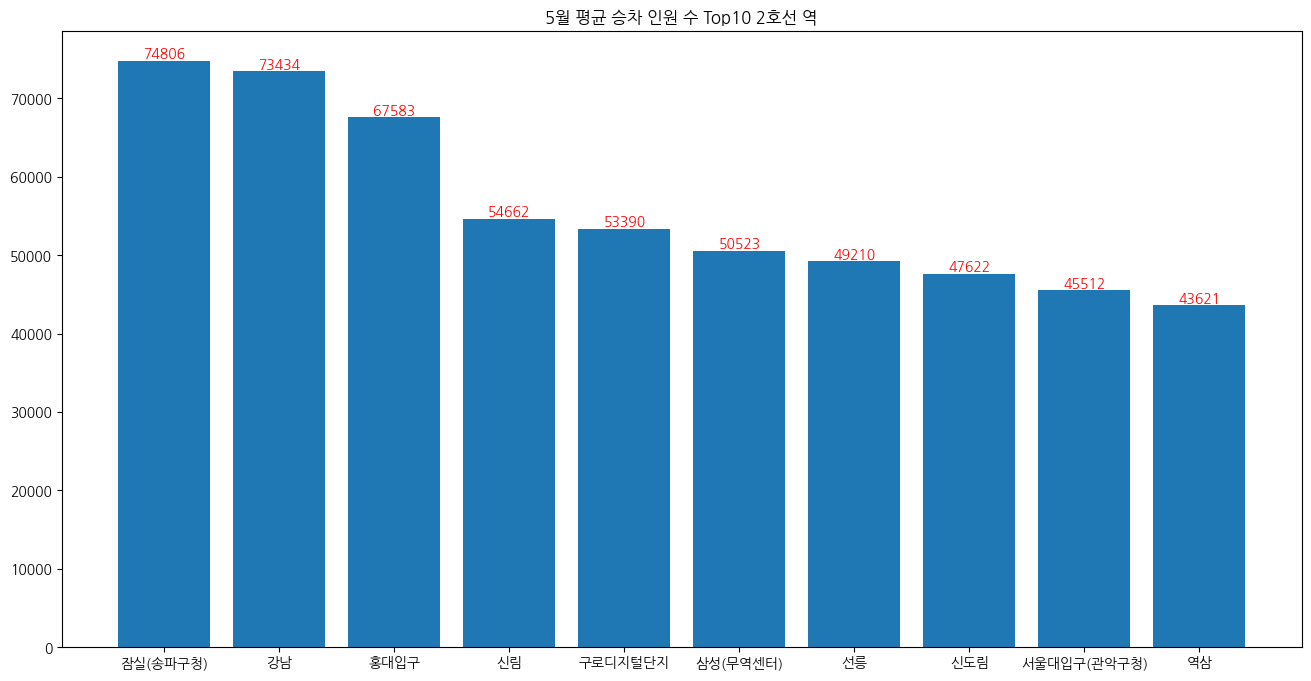

In [19]:
import matplotlib.pyplot as plt

# 나눔고딕 폰트 설정
plt.rc('font', family='NanumGothic')

plt.figure(figsize = (16, 8))

plt.bar(top10_ride['역명'][:10], top10_ride['평균 승차 승객 수'][:10])
for x, y in enumerate(list(top10_ride['평균 승차 승객 수'][:10])):
  plt.text(x, y, y, fontsize=10, color='#ff0000',
           horizontalalignment='center', verticalalignment='bottom')

plt.title('5월 평균 승차 인원 수 Top10 2호선 역')
plt.show()

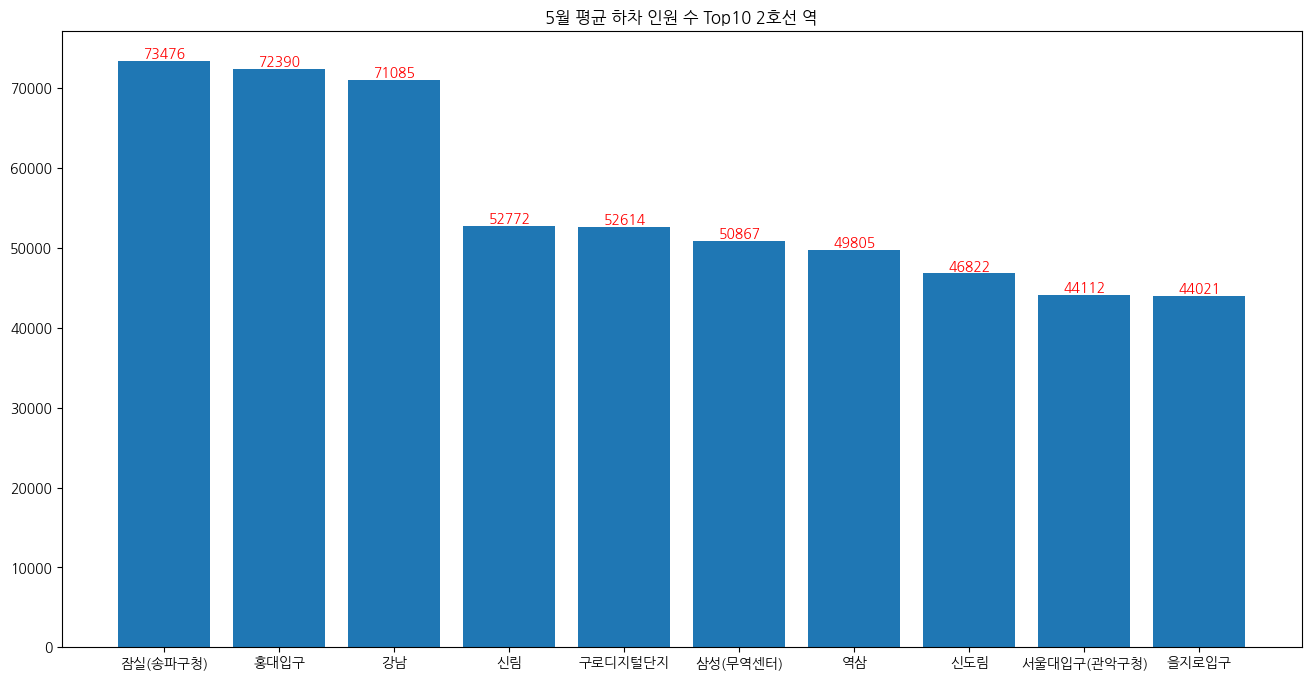

In [20]:
plt.figure(figsize = (16, 8))

plt.bar(top10_off['역명'][:10],top10_off['평균 하차 승객 수'][:10])
for x, y in enumerate(list(top10_off['평균 하차 승객 수'][:10])):
  plt.text(x, y, y, fontsize=10, color='#ff0000',
           horizontalalignment='center', verticalalignment='bottom')

plt.title('5월 평균 하차 인원 수 Top10 2호선 역')
plt.show()

* 지하철 역 위치 데이터프레임에 저장

In [21]:
import re
table['역명']=table['역명'].apply(lambda x: re.sub(r'\([^)]*\)', '',x) if '(' in x else x)
table['역명']=table['역명'].apply(lambda x:x+'역')

x=[]
y=[]
x = []
y = []

for z in table['역명']:
    urI = 'https://dapi.kakao.com/v2/local/search/keyword.json?query={}'.format(z)
    headers = {
        "Authorization": "KakaoAK df840192deff85fa2317bd38da2294a6"
    }
    response = requests.get(urI, headers=headers).json()

    # documents 리스트가 비어있는지 확인
    if 'documents' in response and response['documents']:
        places = response['documents'][0]
        x.append(places['y'])
        y.append(places['x'])
    else:
        # 예외 처리: 결과가 없을 때의 동작 설정
        x.append(None)
        y.append(None)

table['latitude'] = x
table['longitude'] = y


table

,역명,평균 승차 승객 수,평균 하차 승객 수,latitude,longitude
0,시청역,23582,22220,37.56534539636417,126.97719821079865
1,을지로입구역,43379,44021,37.566035517712955,126.9821953112953
2,을지로3가역,22523,22008,37.56629149790628,126.99098443539428
3,을지로4가역,12871,13200,37.5666405038268,126.997632059113
4,동대문역사문화공원역,14307,16398,37.56566440553802,127.00900417014896
5,신당역,14254,14961,37.5656730531732,127.019477533278
6,상왕십리역,13699,13147,37.56443666620397,127.02927241035283
7,왕십리역,15762,13744,37.561268363317176,127.03710337610202
8,한양대역,12629,14285,37.5557159860408,127.043639802768
9,뚝섬역,22173,23204,37.547241554679,127.04738727881


4) 이디야 지도 시각화

In [23]:
import folium
from folium.plugins import MarkerCluster
from folium import Choropleth

# 위치 설정
loc = [37.5642135, 127.0016985] # 위도(N), 경도(E)
data2_size = len(df_seoul_ediya)

# 지도 정의
map = folium.Map(location=loc, zoom_start=14)
Choropleth(
    geo_data=geo_str,
    data=ediya_gu['상호명'],
    columns=[ediya_gu.index, ediya_gu['상호명']],
    fill_color='YlGnBu',
    key_on='feature.id'
).add_to(map)

marker_cluster = MarkerCluster().add_to(map)

# 이디야 위치
for i in range(data2_size):

    folium.Marker(list(df_seoul_ediya.iloc[i][['위도', '경도']]),
                 popup=folium.Popup(df_seoul_ediya.iloc[i]['상호명']),
                 icon=folium.Icon(color='blue')).add_to(marker_cluster)


map.save('map_ediya.html')

5) 지하철 평균 승하차 인원 수 지도 시각화

In [24]:
loc = [37.540632, 126.981558]
map1 = folium.Map(location=loc, zoom_start=13)
# 지하철 위치 및 평균 승차/하차 승객 수
for i in range(0, 50):
    latitude = table.iloc[i]['latitude']
    longitude = table.iloc[i]['longitude']
    avg_ride_passengers = table.iloc[i]['평균 승차 승객 수']
    avg_exit_passengers = table.iloc[i]['평균 하차 승객 수']

    # 지하철 위치 마커
    folium.Marker([latitude, longitude], popup=table.iloc[i]['역명'], icon=folium.Icon(color='orange')).add_to(map1)

    # 평균 승차 승객 수에 따른 원 추가
    folium.CircleMarker([latitude, longitude], radius=avg_ride_passengers / 500, popup=table.iloc[i]['역명'],
                        color='#3186cc', fill_color='#3186cc').add_to(map1)

    # 평균 하차 승객 수에 따른 원 추가
    folium.CircleMarker([latitude, longitude], radius=avg_exit_passengers / 500, popup=table.iloc[i]['역명'],
                        color='#cc4831', fill_color='#cc4831').add_to(map1)


map.save('map_subway.html')

6) 공영주차장 위치 및 분포 현황 지도 시각화

In [25]:
loc = [37.5642135, 127.0016985]
map2 = folium.Map(location=loc, zoom_start=12)

# 강서구, 영등포구, 양천구 주차장 위치 추가
for i in range(len(car2)):

    marker02 =  folium.Marker((car2.iloc[i][['위도', '경도']]),
                 popup=folium.Popup(car2.iloc[i]['주차장명']),
                 icon=folium.Icon(icon="car", prefix="fa", color='black'))
    marker02.add_to(map2)

# 주차장 위치
for i in range(len(car1)):

    marker02 =  folium.Marker((car1.iloc[i][['위도', '경도']]),
                 popup=folium.Popup(car1.iloc[i]['주차장 명']),
                 icon=folium.Icon(icon="car", prefix="fa", color='black'))
    marker02.add_to(map2)


map.save('map_car.html')

### 4) 결과

In [26]:
loc = [37.540632, 126.981558]
data2_size = len(df_seoul_ediya)

# 지도 정의
map = folium.Map(location=loc, zoom_start=13)
Choropleth(
    geo_data=geo_str,
    data=ediya_gu['상호명'],
    columns=[ediya_gu.index, ediya_gu['상호명']],
    fill_color='YlGnBu',
    key_on='feature.id'
).add_to(map)

marker_cluster = MarkerCluster().add_to(map)

# 이디야 위치
for i in range(data2_size):

    folium.Marker(list(df_seoul_ediya.iloc[i][['위도', '경도']]),
                 popup=folium.Popup(df_seoul_ediya.iloc[i]['상호명']),
                 icon=folium.Icon(color='blue')).add_to(marker_cluster)

# 지하철 위치 및 평균 승차/하차 승객 수
for i in range(0, 50):
    latitude = table.iloc[i]['latitude']
    longitude = table.iloc[i]['longitude']
    avg_ride_passengers = table.iloc[i]['평균 승차 승객 수']
    avg_exit_passengers = table.iloc[i]['평균 하차 승객 수']

    # 지하철 위치 마커
    folium.Marker([latitude, longitude], popup=table.iloc[i]['역명'], icon=folium.Icon(color='orange')).add_to(map)

    # 평균 승차 승객 수에 따른 원 추가
    folium.CircleMarker([latitude, longitude], radius=avg_ride_passengers / 500, popup=table.iloc[i]['역명'],
                        color='#3186cc', fill_color='#3186cc').add_to(map)

    # 평균 하차 승객 수에 따른 원 추가
    folium.CircleMarker([latitude, longitude], radius=avg_exit_passengers / 500, popup=table.iloc[i]['역명'],
                        color='#cc4831', fill_color='#cc4831').add_to(map)

# 강서구, 영등포구, 양천구 주차장 위치 추가
for i in range(len(car2)):

    marker02 =  folium.Marker((car2.iloc[i][['위도', '경도']]),
                 popup=folium.Popup(car2.iloc[i]['주차장명']),
                 icon=folium.Icon(icon="car", prefix="fa", color='black'))
    marker02.add_to(map)

# 주차장 위치
for i in range(len(car1)):

    marker02 =  folium.Marker((car1.iloc[i][['위도', '경도']]),
                 popup=folium.Popup(car1.iloc[i]['주차장 명']),
                 icon=folium.Icon(icon="car", prefix="fa", color='black'))
    marker02.add_to(map)


map.save('map_all.html')